# **Implementing a Multilayer Artificial Neural Network from Scratch**


### **Outline**

- Modeling complex functions with artificial neural networks
    - Single-layer neural network recap
    - Introducing the multilayer neural network architecture
    - Activating a neural network via forward propagation

- Classifying handwritten digits
    - Obtaining the MNIST dataset
    - Implementing a multilayer perceptron
    - Coding the neural network training loop
    - Evaluating the neural network performance

- Training an artificial neural network
    - Computing the loss function
    - Developing your intuition for backpropagation
    - Training neural networks via backpropagation

- About the convergence in neural networks

- A few last words about the neural network implementation

- Summary

In [1]:
from IPython.display import Image
%matplotlib inline

## **Modeling complex functions with artificial neural networks**

Artificial neurons represent the building blocks of the multilayer artificial NNs.

### **Single-layer neural network recap**


##### **1. Core Concept**

A **single-layer neural network** is the simplest form of an artificial neural network (ANN).
It consists of:

* An **input layer** (features),
* A **single output layer** (neurons),
* **No hidden layers**.

Despite its simplicity, it forms the mathematical and conceptual foundation for deeper networks.



##### **2. Network Structure**

If there are $`n`$ input features and $`m`$ output neurons, then:

* Input vector: $`x = [x_1, x_2, ..., x_n]^{\mathrm{T}}`$
* Weight matrix: $`W = [w_{ij}] \in \mathbb{R}^{m \times n}`$
* Bias vector: $`b = [b_1, b_2, ..., b_m]^{\mathrm{T}}`$
* Output vector (pre-activation):
  $`z = W x + b`$

After applying an activation function $`\phi(\cdot)`$, the final output becomes:
$`y = \phi(z) = \phi(Wx + b)`$



##### **3. Forward Propagation**

For a single neuron (unit):

$$y = \phi\left(\sum_{i=1}^{n} w_i x_i + b\right)$$

Here:

* $`x_i`$ = input feature,
* $`w_i`$ = corresponding weight,
* $`b`$ = bias term,
* $`\phi(\cdot)`$ = activation function.

The activation function introduces **non-linearity**, enabling the model to learn non-linear relationships between inputs and outputs.



##### **4. Common Activation Functions**

| Function     | Formula                                             | Range               | Purpose                                 |
| ------------ | --------------------------------------------------- | ------------------- | --------------------------------------- |
| **Identity** | $`\phi(z) = z`$                                     | $(-\infty, \infty)$ | Used in linear regression.              |
| **Sigmoid**  | $`\phi(z) = \frac{1}{1 + e^{-z}}`$                  | $(0, 1)$            | For binary classification.              |
| **Tanh**     | $`\phi(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}`$ | $(-1, 1)$           | Zero-centered, smoother gradients.      |
| **ReLU**     | $`\phi(z) = \max(0, z)`$                            | $[0, \infty)$       | Sparse activations, faster convergence. |



##### **5. Loss Function**

The choice of loss function depends on the task:

| Task                          | Common Loss Function      | Formula                                                                                 |
| ----------------------------- | ------------------------- | --------------------------------------------------------------------------------------- |
| **Regression**                | Mean Squared Error (MSE)  | $`L = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2`$                                   |
| **Binary Classification**     | Binary Cross-Entropy      | $`L = -\frac{1}{N}\sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)]`$ |
| **Multiclass Classification** | Categorical Cross-Entropy | $`L = -\sum_{i=1}^{N} y_i \log(\hat{y}_i)`$                                             |



##### **6. Learning — Gradient Descent**

The learning process involves **optimizing weights and biases** to minimize the loss.
For each parameter $`\theta \in \{W, b\}`$, update using gradient descent:

$$\theta \leftarrow \theta - \eta \frac{\partial L}{\partial \theta}$$

where:

* $`\eta`$ = learning rate,
* $`\frac{\partial L}{\partial \theta}`$ = gradient of the loss function.

Gradients are computed using the **chain rule** (backpropagation).



##### **7. Example: Binary Classification**

For one neuron with sigmoid activation:

1. Forward pass:
   $`\hat{y} = \frac{1}{1 + e^{-(w^{\mathrm{T}}x + b)}}`$

2. Loss:
   $`L = -[y \log(\hat{y}) + (1 - y)\log(1 - \hat{y})]`$

3. Gradient updates:
   $`\begin{aligned}
   \frac{\partial L}{\partial w} &= (\hat{y} - y)x \\
   \frac{\partial L}{\partial b} &= (\hat{y} - y)
   \end{aligned}`$

4. Update rule:
   $`\begin{aligned}
   w &\leftarrow w - \eta (\hat{y} - y)x \\
   b &\leftarrow b - \eta (\hat{y} - y)
   \end{aligned}`$



##### **8. Relationship to Other Models**

| Model                   | Equivalent Neural Network                                  |
| ----------------------- | ---------------------------------------------------------- |
| **Linear Regression**   | No activation function (identity).                         |
| **Logistic Regression** | Single neuron with sigmoid activation.                     |
| **Softmax Regression**  | Single layer with multiple outputs and softmax activation. |

Thus, linear and logistic regressions are **special cases** of single-layer networks.



##### **9. Limitations**

* Cannot model **non-linear relationships** effectively (without non-linear activations).
* Limited representational power — only **linear separability**.
* Sensitive to **feature scaling**.



##### **10. Summary**

| Concept                | Formula / Idea                                                         |
| ---------------------- | ---------------------------------------------------------------------- |
| Forward pass           | $`y = \phi(Wx + b)`$                                                   |
| Loss function          | Depends on task (MSE or Cross-Entropy)                                 |
| Learning rule          | $`\theta \leftarrow \theta - \eta \frac{\partial L}{\partial \theta}`$ |
| Gradient (binary case) | $`\frac{\partial L}{\partial w} = (\hat{y} - y)x`$                     |
| Activation (sigmoid)   | $`\phi(z) = \frac{1}{1 + e^{-z}}`$                                     |



**In essence:**
A **single-layer neural network** performs a weighted linear combination of inputs, applies a non-linear activation, and adjusts its parameters via gradient descent to minimize loss. It’s the mathematical foundation upon which **multi-layer (deep) neural networks** are built.


---

### **Introducing the multi-layer neural network architecture**


![Two Layer MLP](./figures/two-layer-MLP.png)


##### **1. Core Idea**

A **multi-layer neural network (MLP — Multi-Layer Perceptron)** extends the single-layer architecture by introducing one or more **hidden layers** between input and output layers.
These hidden layers enable the network to model **non-linear, complex functions**, overcoming the linear limitations of single-layer networks.



##### **2. Mathematical Structure**

For a neural network with $`L`$ layers (excluding the input layer):

* Input: $`x \in \mathbb{R}^{d}`$

* For each layer $`\ell = 1, 2, ..., L`$:

  $`\begin{aligned}
  z^{(\ell)} &= W^{(\ell)} a^{(\ell-1)} + b^{(\ell)} \\
  a^{(\ell)} &= \phi^{(\ell)}(z^{(\ell)})
  \end{aligned}`$

where:

* $`a^{(0)} = x`$ (input features),
  
* $`W^{(\ell)} \in \mathbb{R}^{n_\ell \times n_{\ell-1}}`$ = weight matrix,
  
* $`b^{(\ell)} \in \mathbb{R}^{n_\ell}`$ = bias vector,
  
* $`\phi^{(\ell)}(\cdot)`$ = activation function at layer $`\ell`$,
  
* $`a^{(L)}`$ = final network output.


The entire network defines a composite function:

$$f(x; \theta) = \phi^{(L)}(W^{(L)} \phi^{(L-1)}(... \phi^{(1)}(W^{(1)}x + b^{(1)}) ... ) + b^{(L)})$$

where $`\theta = \{W^{(\ell)}, b^{(\ell)}\}_{\ell=1}^{L}`$ represents all learnable parameters.



##### **3. Role of Hidden Layers**

Hidden layers enable **hierarchical feature representation**:

* Early layers learn **simple patterns** (e.g., edges, local features).

* Deeper layers learn **complex abstractions** (e.g., shapes, semantic structures).

This hierarchical learning is what gives neural networks their **representational depth** and **generalization power**.



##### **4. Universal Approximation Theorem**

The **Universal Approximation Theorem** states that:

> A feedforward neural network with one hidden layer containing a finite number of neurons and a non-linear activation function can approximate any continuous function on compact subsets of ℝⁿ.

Mathematically:
For any continuous function $`f`$ and tolerance $`\epsilon > 0`$, there exists an MLP such that:

$$|f(x) - \hat{f}(x)| < \epsilon, \quad \forall x \in \mathbb{R}^n$$

This establishes **theoretical sufficiency** of neural networks as universal function approximators.



##### **5. Activation Functions and Non-linearity**

Hidden layers employ **non-linear activation functions** to introduce **non-linear transformations**, crucial for learning complex mappings.

| Activation     | Formula                                         | Purpose                                               |
| -------------- | ----------------------------------------------- | ----------------------------------------------------- |
| **ReLU**       | $`\phi(z) = \max(0, z)`$                        | Prevents vanishing gradients; fast convergence.       |
| **Leaky ReLU** | $`\phi(z) = \max(0.01z, z)`$                    | Allows small gradient when inactive.                  |
| **Sigmoid**    | $`\phi(z) = \frac{1}{1 + e^{-z}}`$              | Smooth probability outputs (used in output layer).    |
| **Tanh**       | $`\phi(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}`$ | Zero-centered, smooth transitions.                    |
| **Softmax**    | $`\phi_j(z) = \frac{e^{z_j}}{\sum_k e^{z_k}}`$  | Converts outputs to probabilities (multiclass tasks). |



##### **6. Loss Function and Optimization**

The network parameters $`\theta`$ are optimized to minimize a loss function $`L(y, \hat{y})`$, typically using **stochastic gradient descent (SGD)** or its variants (Adam, RMSProp).

Update rule for each parameter:

$$\theta^{(t+1)} = \theta^{(t)} - \eta \frac{\partial L}{\partial \theta}$$

where:

* $`\eta`$ = learning rate,

* $`\frac{\partial L}{\partial \theta}`$ computed via **backpropagation**.



##### **7. Backpropagation (Gradient Flow)**

Backpropagation computes gradients layer-by-layer using the **chain rule**:

$$\delta^{(\ell)} = ((W^{(\ell+1)})^{\mathrm{T}}\delta^{(\ell+1)}) \odot \phi'^{(\ell)}(z^{(\ell)})$$

where:

* $`\delta^{(\ell)}`$ = error term for layer $`\ell`$,

* $`\phi'^{(\ell)}(z^{(\ell)})`$ = derivative of activation,

* Gradients:
  $`\frac{\partial L}{\partial W^{(\ell)}} = \delta^{(\ell)} (a^{(\ell-1)})^{\mathrm{T}}`$

This mechanism enables **efficient computation** of gradients in deep networks.



##### **8. Regularization and Generalization**

To prevent overfitting, MLPs use **regularization** techniques:

| Technique               | Description                                             |
| ----------------------- | ------------------------------------------------------- |
| **L2 (Weight Decay)**   | Penalizes large weights: $`L_{reg} = \lambda \sum W^2`$ |
| **Dropout**             | Randomly deactivates neurons during training.           |
| **Batch Normalization** | Normalizes activations to stabilize learning.           |
| **Early Stopping**      | Stops training when validation loss stops improving.    |



##### **9. Interpretation in Matrix Form**

For two hidden layers:

$$\begin{aligned}
a^{(1)} &= \phi^{(1)}(W^{(1)}x + b^{(1)}) \\
a^{(2)} &= \phi^{(2)}(W^{(2)}a^{(1)} + b^{(2)}) \\
\hat{y} &= \phi^{(3)}(W^{(3)}a^{(2)} + b^{(3)})
\end{aligned}$$

Each layer successively transforms the input space into a new **feature subspace**, leading to more abstract representations.



##### **10. Summary Table**

| Concept                  | Description                        | Mathematical Representation                                                              |
| ------------------------ | ---------------------------------- | ---------------------------------------------------------------------------------------- |
| **Layer computation**    | Linear transformation + activation | $`a^{(\ell)} = \phi(W^{(\ell)}a^{(\ell-1)} + b^{(\ell)})`$                               |
| **Learning objective**   | Minimize loss                      | $`\min_\theta L(y, f(x; \theta))`$                                                       |
| **Gradient flow**        | Chain rule backward                | $`\frac{\partial L}{\partial W^{(\ell)}} = \delta^{(\ell)} (a^{(\ell-1)})^{\mathrm{T}}`$ |
| **Representation power** | Non-linear hierarchical mapping    | Deep composition of functions                                                            |



##### **In essence:**

A **multi-layer neural network** is a composition of affine and non-linear transformations that progressively map input data into higher-level feature spaces.
By stacking layers, it captures complex patterns and dependencies, forming the mathematical backbone of **deep learning architectures** such as CNNs, RNNs, and Transformers.


---

### **Activating a neural network via forward propagation**

MLP learning procedure in three simple steps:

- Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output.
- Based on the network's output, we calculate the loss that we want to minimize using a loss function.
- We backpropagate the loss, find its derivative with respect to each weight and bias unit in the network, and update the model.

![Sigmoid Activation Function](./figures/sigmoid.png)

##### **1. Concept Overview**

Forward propagation is the process by which input data moves **forward through the layers** of a neural network to generate an output.
It’s the computational mechanism that connects **input features**, **weights**, **biases**, and **activation functions** to produce predictions.

The goal is to compute the output $`\hat{y}`$ from the input $`x`$, given the network’s parameters.



##### **2. Core Mathematical Framework**

For a multi-layer network with $`L`$ layers:

* $`x`$: input vector
* $`W^{[l]}`$: weight matrix at layer $`l`$
* $`b^{[l]}`$: bias vector at layer $`l`$
* $`a^{[l]}`$: activation (output) of layer $`l`$
* $`z^{[l]}`$: linear combination before activation

The forward propagation equations are:

1. **Linear transformation (affine mapping):**

   $`z^{[l]} = W^{[l]} a^{[l-1]} + b^{[l]}`$

   where $`a^{[0]} = x`$ (input features).

2. **Nonlinear activation:**

   $`a^{[l]} = g^{[l]}(z^{[l]})`$

   where $`g^{[l]}`$ is the activation function (e.g., sigmoid, ReLU, tanh).

3. **Final output:**

   For regression tasks:
   $`\hat{y} = a^{[L]}`$

   For classification tasks:
   $`\hat{y} = \mathrm{softmax}(z^{[L]})`$ or $`\sigma(z^{[L]})`$ (for binary).



##### **3. Matrix Dimensions**

If layer $`l-1`$ has $`n_{l-1}`$ units and layer $`l`$ has $`n_l`$ units:

* $`W^{[l]}`$: shape $`(n_l, n_{l-1})`$
* $`b^{[l]}`$: shape $`(n_l, 1)`$
* $`a^{[l]}`$: shape $`(n_l, 1)`$

This ensures each layer’s output becomes the next layer’s input.



##### **4. Activation Functions**

Each layer applies a nonlinearity that enables complex mappings:

| Activation | Formula                                                  | Gradient                    | Use Case                      |
| ---------- | -------------------------------------------------------- | --------------------------- | ----------------------------- |
| Sigmoid    | $`\sigma(z)=\frac{1}{1+e^{-z}}`$                         | $`\sigma(z)(1-\sigma(z))`$  | Binary classification         |
| Tanh       | $`\tanh(z)=\frac{e^z-e^{-z}}{e^z+e^{-z}}`$               | $`1-\tanh^2(z)`$            | Hidden layers (centered at 0) |
| ReLU       | $`\max(0,z)`$                                            | $`1`$ if $`z>0`$ else $`0`$ | Deep nets, sparse activations |
| Softmax    | $`\mathrm{softmax}(z_i)=\frac{e^{z_i}}{\sum_j e^{z_j}}`$ | Used in output layer        | Multi-class classification    |



##### **5. Example — Two-Layer Network**

Given input $`x`$:

1. Hidden layer:
   $`z^{[1]} = W^{[1]}x + b^{[1]}`$
   $`a^{[1]} = \mathrm{ReLU}(z^{[1]})`$

2. Output layer:
   $`z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}`$
   $`\hat{y} = \sigma(z^{[2]})`$  (binary classification)



##### **6. Computational Flow Summary**

| Step | Operation                                          | Purpose                     |
| ---- | -------------------------------------------------- | --------------------------- |
| 1    | $`x \rightarrow z^{[1]} = W^{[1]}x + b^{[1]}`$     | Linear transformation       |
| 2    | $`z^{[1]} \rightarrow a^{[1]} = g^{[1]}(z^{[1]})`$ | Introduce nonlinearity      |
| 3    | Repeat for layers 2...L                            | Deep feature transformation |
| 4    | $`a^{[L]} \rightarrow \hat{y}`$                    | Compute final prediction    |



##### **7. Key Insights**

* Forward propagation is **differentiable**, enabling **backpropagation** later.
* It defines the **hypothesis function** $`\hat{y} = f(x; W, b)`$ learned from data.
* The **depth and choice of activations** determine the expressive power of the network.
* Nonlinear activations allow the network to **model complex, non-linear relationships**.


---

## **Classifying handwritten digits**

- implement and train our first multilayer `NN` to classify handwritten digits from the popular `Mixed National Institute of Standards and Technology (MNIST)` dataset.

**Obtaining and preparing the MNIST dataset**

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts:

- Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, 60,000 examples)

- Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, 60,000 labels)

- Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, 10,000 examples)

- Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, 10,000 labels)

In [4]:
import ssl
from sklearn.datasets import fetch_openml

ssl._create_default_https_context = ssl._create_unverified_context

X, y = fetch_openml('mnist_784', 
                    version=1, 
                    return_X_y=True)
X = X.values
y = y.astype(int).values


In [7]:
print(X.shape)

(70000, 784)


In [8]:
print(y.shape)

(70000,)


In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

- **Normalize to [-1, 1] range:**

scaled the images on a pixel-by-pixel basis, which is different from the feature-scaling approach discuss earlier.

In [14]:
X = ((X / 255.) - .5) * 2
X

array([[-1.00784314, -1.00784314, -1.00784314, ..., -1.00784314,
        -1.00784314, -1.00784314],
       [-1.00784314, -1.00784314, -1.00784314, ..., -1.00784314,
        -1.00784314, -1.00784314],
       [-1.00784314, -1.00784314, -1.00784314, ..., -1.00784314,
        -1.00784314, -1.00784314],
       ...,
       [-1.00784314, -1.00784314, -1.00784314, ..., -1.00784314,
        -1.00784314, -1.00784314],
       [-1.00784314, -1.00784314, -1.00784314, ..., -1.00784314,
        -1.00784314, -1.00784314],
       [-1.00784314, -1.00784314, -1.00784314, ..., -1.00784314,
        -1.00784314, -1.00784314]])

**Best Practices for Scaling Image Data in Deep Learning**

1. **Normalization:**
   Scale pixel values from `[0, 255]` to `[0, 1]` by dividing by 255. Improves convergence and stability.

2. **Standardization:**
   Subtract the dataset mean and divide by the standard deviation — especially for pretrained models expecting normalized inputs (e.g., ImageNet).

3. **Consistent Scaling:**
   Apply the same scaling transformation to both training and test data.

4. **Avoid Data Leakage:**
   Fit scaling parameters (mean, std) only on the training set, then apply to validation/test sets.

5. **Use Framework Utilities:**
   Prefer built-in preprocessors (e.g., `tf.keras.applications.*.preprocess_input` or `torchvision.transforms.Normalize`) for compatibility with pretrained models.


- **Visualize the first digit of each class:**

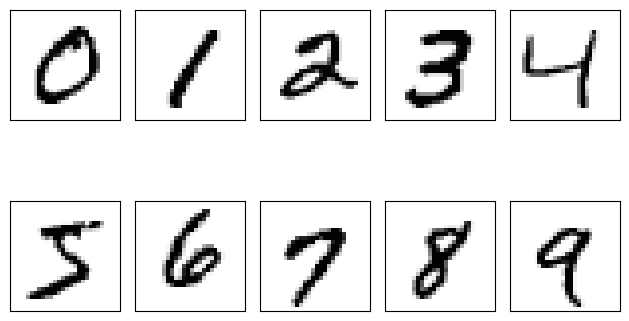

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2,
                       ncols=5,
                       sharex=True,
                       sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

- **Plot example of the same digit to see how different the handwriting for each really is:**

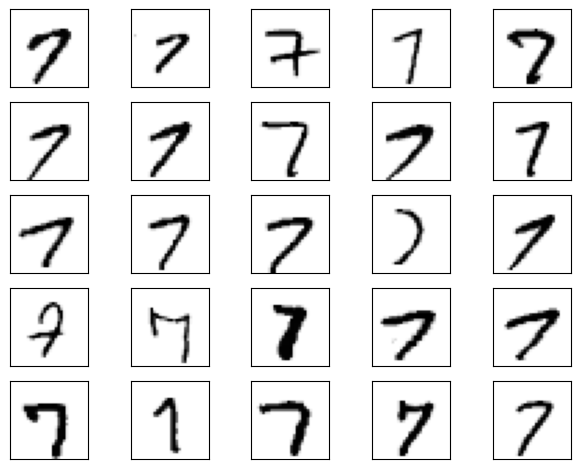

In [17]:
fig, ax = plt.subplots(nrows=5,
                       ncols=5,
                       sharex=True,
                       sharey=True
                       )
ax = ax.flatten()
for i in range(25):
    img = X[y == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

- **Split into training, validation, and test set:**

In [18]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=10000, random_state=123,
    stratify=y
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=5000,
    random_state=123, stratify=y_temp
)
# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [19]:
X_train.shape, X_valid.shape, X_test.shape

((55000, 784), (5000, 784), (10000, 784))

### **Implementing a multi-layer perceptron**

- Implememt a MLP from scratch to classify the images in the `MNIST` dataset.
- MLP with only one hidden layer.

In [20]:
import numpy as np

##########################
### MODEL
##########################

def sigmoid(z):
    return 1. / (1. + np.exp(-z))


def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary


class NeuralNetMLP:
    
    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()
        
        self.num_classes = num_classes
        
        # hidden
        rng = np.random.RandomState(random_seed)
        
        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features)
        )
        self.bias_h = np.zeros(num_hidden)
        
        # output
        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden)
        )
        self.bias_out = np.zeros(num_classes)
        
    def forward(self, x):
        # Hidden layer
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T
        # output dim: [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T 
        # output dim: [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out
    
    def backward(self, x, a_h, a_out, y):
        
        #########################
        ### Output layer weights
        #########################
        
        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)
        
        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights
        
        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h
        
        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)
        
        
        
        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out
        
        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)
        
        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative
        
        # [n_examples, n_features]
        d_z_h__d_w_h = x
        
        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out, 
                d_loss__d_w_h, d_loss__d_b_h)

- The `backward` method implements the so-called `backpropagation algorithm`, which calculates the gradients of the loss with respect to the weight and bias parameters. Similar to Adaline, these gradients are then used to update these parameters via gradient descent.

- Looking at this code implementation of the `NeuralNetMLP` class, you may have noticed that this object-oriented implementation differs from the familiar scikit-learn API that is centered around the `.fit()` and `.predict()` methods. 

- The main methods of the `NeuralNetMLP` class are the `.forward()` and `.backward()` methods. One of the reasons behind this is that it makes a complex neural network a bit easier to understand in terms of how the information flows through the networks.

In [22]:
# Instantiate a new `NeuralNetMLP` object:
model = NeuralNetMLP(num_features=28*28,
                     num_hidden=50,
                     num_classes=10)

In [32]:
model.weight_h.shape, model.bias_h.shape

((50, 784), (50,))

- The model accepts `MNIST` images reshaped into `784-dimensional` vectors (in the format of `X_train`, `X_valid`, or `X_test`, which we defined previously) for the 10 integer classes (digits 0-9). The hidden layer consists of 50 nodes.

- Also, as you may be able to tell from looking at the previously defined `.forward()` method, we use a sigmoid activation function after the first hidden layer and output layer to keep things simple.


![NN Architecture](./figures/NN-Architecture.png)

### **Coding the neural network training loop**

- Defining data loaders:
  - mini-batch generator
  - takes dataset and divides it into mini-batches of a desired size for stochastic gradient descent training

In [ ]:
import numpy as np

num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        
        yield X[batch_idx], y[batch_idx]

# Iterate over training epochs
for i in range(num_epochs):
    # iterate over minibatches
    minibatch_gen = minibatch_generator(
        X_train, y_train, minibatch_size
    )
    for X_train_mini, y_train_mini in minibatch_gen:
        break
    break

print(X_train_mini.shape)

(100, 784)


In [34]:
print(y_train_mini.shape)

(100,)


- **Defining a function to compute the loss and accuracy**

In [42]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets) 


_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)

print(f'Initial validation MSE: {mse:.1f}')
print(f'Initial validation accuracy: {acc*100:.1f}%')

Initial validation MSE: 0.3
Initial validation accuracy: 9.8%
